In [1]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
import src.data_prep as data
import src.models.linear_reg as linear
import src.config.feature_def as feature_def
import src.models.utils as utils

In [2]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")

,NEIGHBOURHOOD_158,REPORT_YEAR,REPORT_MONTH,TotalCrimeScore,Crime_Count,x,y,NSI,Prev_Month_NSI,NSI_3M_Avg
0,0,2014,4,42,11,-8.824712e+06,5.435661e+06,0.914405,0.918580,0.885873
8,0,2014,5,29,8,-8.823638e+06,5.436439e+06,0.941545,0.914405,0.901183
6,0,2014,6,63,17,-8.824837e+06,5.435397e+06,0.870564,0.941545,0.924843
5,0,2014,7,52,13,-8.824463e+06,5.435727e+06,0.893528,0.870564,0.908838
1,0,2014,8,62,16,-8.824389e+06,5.435626e+06,0.872651,0.893528,0.901879
...,...,...,...,...,...,...,...,...,...,...
22385,158,2025,5,152,49,-8.844683e+06,5.421844e+06,0.684760,0.805846,0.788448
22383,158,2025,6,107,34,-8.844762e+06,5.421764e+06,0.778706,0.684760,0.727209
22382,158,2025,7,179,52,-8.844881e+06,5.421330e+06,0.628392,0.778706,0.756437
22379,158,2025,8,154,47,-8.844907e+06,5.421547e+06,0.680585,0.628392,0.697286


In [3]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")

################ define features ################
feature_cols = feature_def.FEATURE_NSI_3M
target_col = feature_def.TARGET_COL

################ train ################
model, y_test, y_pred, metrics = linear.train_linear_model(
    monthly, feature_cols, target_col, scale=True
)
metrics

{'R2': 0.8143254415627668,
 'MAE': 0.041516064529914534,
 'MSE': 0.0031088170403709755,
 'RMSE': 0.055756766767550064}

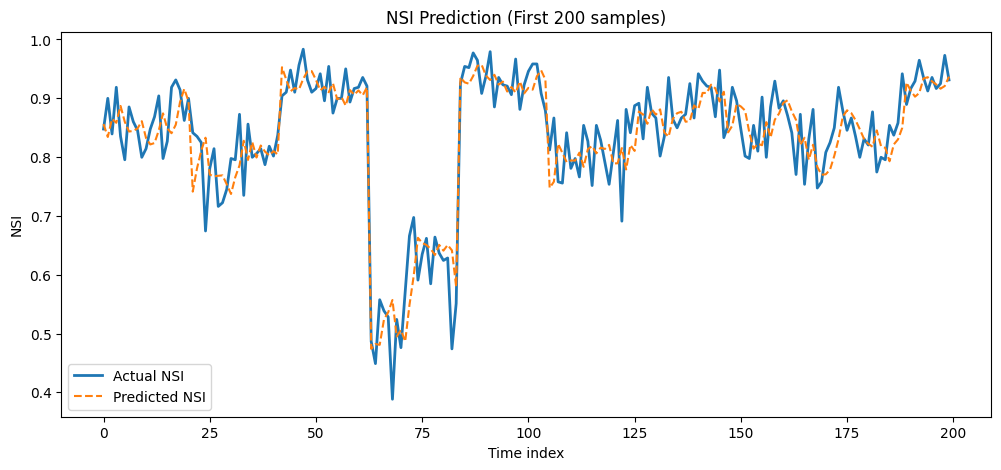

In [4]:
utils.plot_predictions(y_test, y_pred, 200)